# Question # 2

In [31]:
import pandas as pd
import numpy as np
import math
import sys
import tensorflow as tf
import keras
import random 
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers import Input
from keras.models import Model
from keras.layers.core import Dense, Activation 
from keras.layers.recurrent import SimpleRNN

<AxesSubplot:>

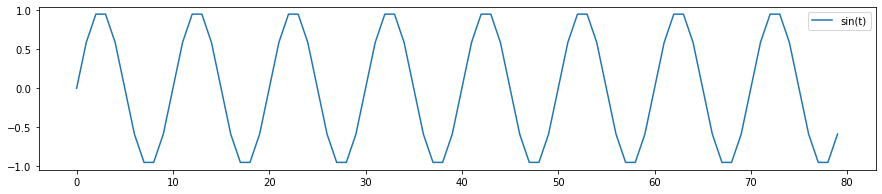

In [32]:
def sinwave(steps_per_cycle = 10,
              number_of_cycles = 100,
              random_factor = 0.4):
    random.seed(0)
    df = pd.DataFrame(np.arange(steps_per_cycle * number_of_cycles + 1), columns=["t"])
    df["sin(t)"] = df.t.apply(lambda x: math.sin(x * (2 * math.pi / steps_per_cycle)+ random.uniform(-1.0, +1.0) * random_factor))
    df["sin(t)clean"] = df.t.apply(lambda x: math.sin(x * (2 * math.pi / steps_per_cycle)))
    return(df)

steps_per_cycle = 10
df = sinwave(steps_per_cycle=steps_per_cycle,
              random_factor = 0)

n_plot = 8
df[["sin(t)"]].head(steps_per_cycle * n_plot).plot(figsize=(15,3))


In [33]:
def data_partII(data, n_prev = 100):  
    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data.iloc[i:i+n_prev])
        docY.append(data.iloc[i+n_prev])
    alsX = np.array(docX)
    alsY = np.array(docY)

    return alsX, alsY

length_of_sequences = 2
test_size = 0.25
ntr = int(len(df) * (1 - test_size))
df_train = df[["sin(t)"]].iloc[:ntr]
df_test  = df[["sin(t)"]].iloc[ntr:]
(X_train, y_train) = data_partII(df_train, n_prev = length_of_sequences)
(X_test, y_test)   = data_partII(df_test, n_prev = length_of_sequences)  
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(748, 2, 1) (748, 1) (249, 2, 1) (249, 1)


In [34]:
def partII_model(length_of_sequences, batch_size = None, stateful = False):
    in_out_neurons = 1
    hidden_neurons = 1
    inp = Input(batch_shape=(batch_size, 
                length_of_sequences, 
                in_out_neurons))  

    rnn = SimpleRNN(hidden_neurons, 
                    return_sequences=False,
                    stateful = stateful,
                    name="RNN")(inp)

    dens = Dense(in_out_neurons,name="dense")(rnn)
    model = Model(inputs=[inp],outputs=[dens])
    
    model.compile(loss="mean_squared_error", optimizer="rmsprop")

    
    return(model,(inp,rnn,dens))
model, (inp,rnn,dens) = partII_model(length_of_sequences = X_train.shape[1])
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 2, 1)]            0         
_________________________________________________________________
RNN (SimpleRNN)              (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
